# Astronomy 499 Winter

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chapter 1: Data Analysis
In this section, we delve into the AGN dataframe and search for any significant trends.

### 1.1 Signal to Noise Ratio
Here we wish to find the signal to noise ratio (SNR) to compare it against various other datapoints. We calculate the SNR for a specific AGN by dividing the average of the magnitude by mag error.

In [60]:
# read data frame
agn_fit_data = pd.read_csv("AGN_ZTF_lcs_fits_BASS_data.csv")
#agn_fit_data

# note: lines with bad data 214,250,278,281,295,296,300,302,308,309,315,320,321
# because data was formated as '1, 2, 3, ... 8, 9, 10'

In [7]:
flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats
def convert_to_float_list(str_list):
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    try:
        return [float(i) for i in str_list.split()]
    except ValueError:
        return flag

In [181]:
# calculate snr for each row in the data frame
data_points = []
snr = []

# index each AGN in agn_fit_data and calculate SNR
for index, row in agn_fit_data.iterrows():
    # get data from row
    y = row['Magnitudes']
    err = row['Mag Errors']
    
    # convert into float lists
    y = convert_to_float_list(y)
    err = convert_to_float_list(err)
    
    # mean of mag and err
    if y != flag:
        mean_y = np.mean(y)
        mean_err = np.mean(err)
        snr_row = mean_y / mean_err
        length = len(y)
    else:
        snr_row = np.sqrt(-1)
        length = np.sqrt(-1)
    
    # save data
    data_points.append(length)
    snr.append(snr_row)

# add snr and light curve lengths to dataframe
agn_fit_data['SNR'] = snr
agn_fit_data['LC Length'] = data_points

# save to new .csv file
agn_fit_data.to_csv('agn_dataframe.csv')

<ipython-input-181-7787c8999220>:22: RuntimeWarning: invalid value encountered in sqrt
  snr_row = np.sqrt(-1)
<ipython-input-181-7787c8999220>:23: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt(-1)


#### Read in new dataframe

In [2]:
# read in new dataframe
agn_fit_data = pd.read_csv('agn_dataframe.csv')

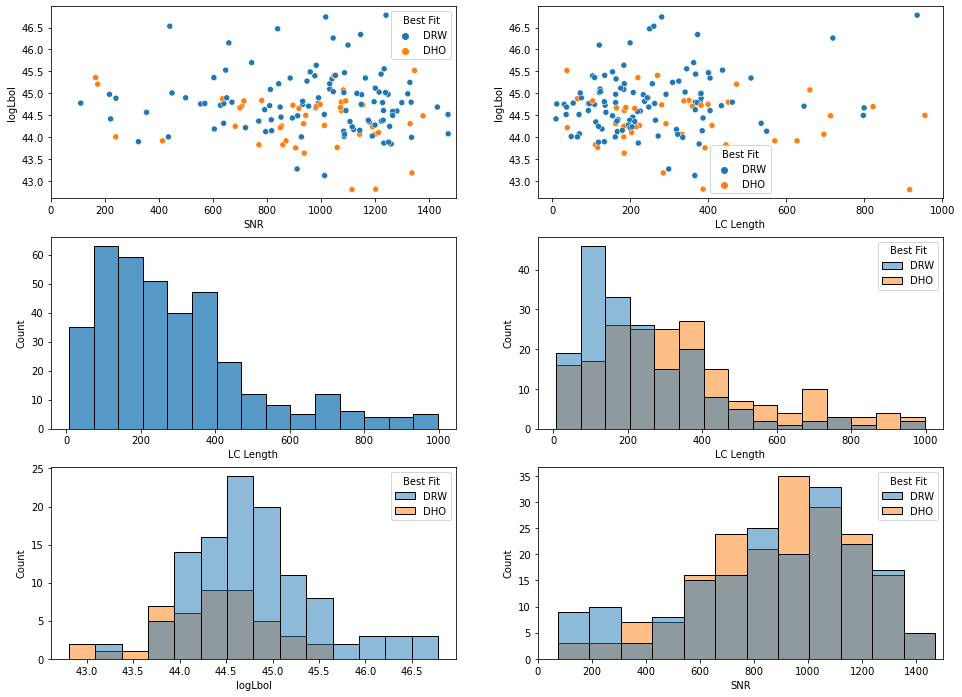

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

#######
# row 0
#######
row = 0

# SNR vs LBol
sns.scatterplot(data=agn_fit_data, x='SNR', y ='logLbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# note: there are some outliers

# LC Length vs LBol
sns.scatterplot(data=agn_fit_data, x='LC Length', y ='logLbol', hue='Best Fit', ax=axs[row,1])

#######
# row 1
#######
row += 1

# histogram of LC Length
sns.histplot(data=agn_fit_data, x='LC Length', ax=axs[row,0])

# histogram of LC Length for best fit
sns.histplot(data=agn_fit_data, x='LC Length', hue='Best Fit', ax=axs[row,1])

#######
# row 2
#######
row += 1

# histogram of LBol for best fit
sns.histplot(data=agn_fit_data, x='logLbol', hue='Best Fit', ax=axs[row,0])

# histogram of SNR for best fit
sns.histplot(data=agn_fit_data, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 
# note: there are some outliers

plt.show()

### 1.2 Chi-Squared
Here we plot the chi-squared for both DRW and DHO against LBol, DRW/DHO fits, SNR, and anything else of value.

#### Histograms

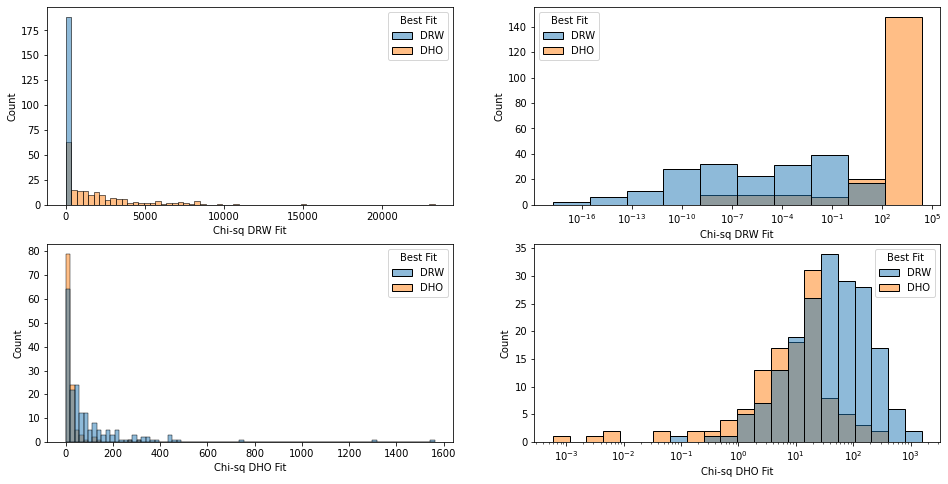

In [204]:
# histograms of chi-squared
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

#######
# row 0
#######
row = 0

# histogram of chi-squared (DRW)
sns.histplot(data=agn_fit_data, x='Chi-sq DRW Fit', hue='Best Fit', ax=axs[row,0])

# histogram of chi-squared (DRW) (scaled logarithmically)
sns.histplot(data=agn_fit_data, x='Chi-sq DRW Fit', hue='Best Fit', log_scale=True, ax=axs[row,1])
axs[row, 1].set(xscale='log')

#######
# row 1
#######
row +=1

# histogram of chi-squared (DHO)
sns.histplot(data=agn_fit_data, x='Chi-sq DHO Fit', hue='Best Fit', ax=axs[row,0])

# histogram of chi-squared (DHO) (scaled logarithmically)
sns.histplot(data=agn_fit_data, x='Chi-sq DHO Fit', hue='Best Fit', log_scale=True, ax=axs[row,1])
axs[row, 1].set(xscale='log')

plt.show()

#### Comparing Chi-Squared of DRW and DHO

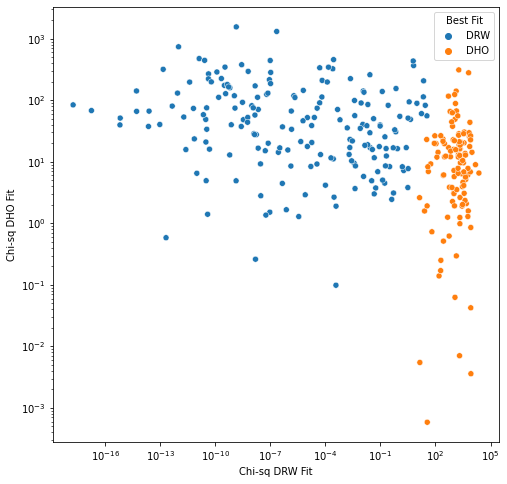

In [203]:
# chi-squared (DRW vs chi-squared (DHO)
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(xscale='log', yscale='log')
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y='Chi-sq DHO Fit', hue='Best Fit')
plt.show()

#### Chi-Sqared vs. logLbol

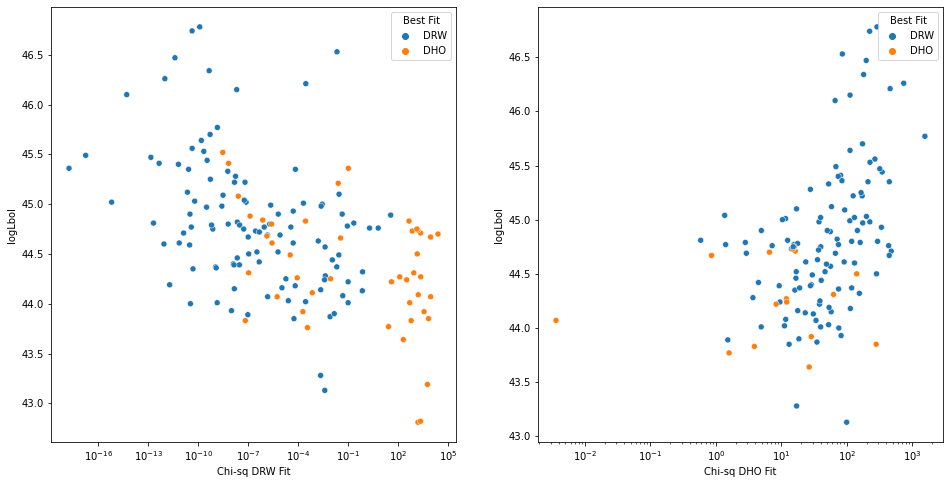

In [39]:
# scatter plots of chi-squared against other LogBol
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# chi-squared (DRW) vs LBol (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='logLbol', hue='Best Fit', ax=axs[0])
axs[0].set(xscale='log')

# chi-squared (DHO) vs LBol (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='logLbol', hue='Best Fit', ax=axs[1])
axs[1].set(xscale='log')

plt.show()

#### Chi-Squared vs. SNR

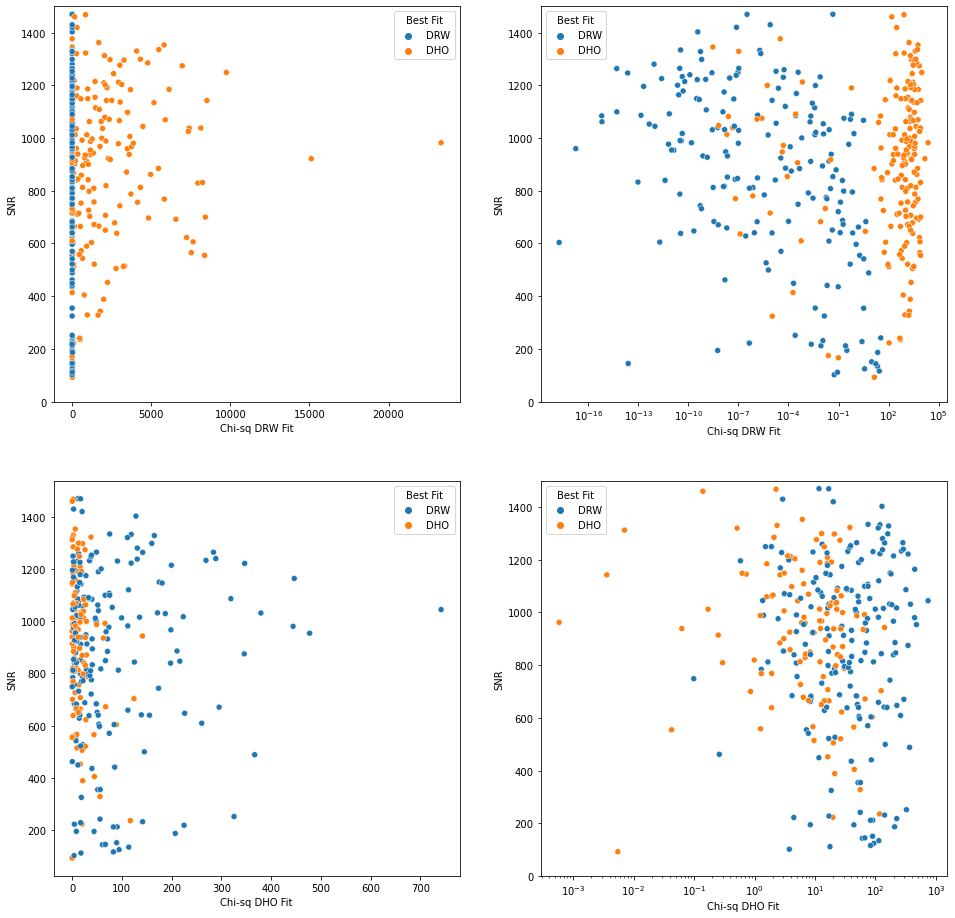

In [40]:
# scatter plots of chi-squared against SNR
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

#######
# row 0
#######
row = 0

# chi-squared (DRW) vs SNR
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='SNR', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_ylim(0, 1500) 

# chi-squared (DRW) vs SNR (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DRW Fit', y ='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_ylim(0, 1500) 
axs[row, 1].set(xscale='log')

#######
# row 1
#######
row += 1

# chi-squared (DHO) vs SNR
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='SNR', hue='Best Fit', ax=axs[row,0])

# chi-squared (DHO) vs SNR (scaled logarithmically)
sns.scatterplot(data=agn_fit_data, x='Chi-sq DHO Fit', y ='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_ylim(0, 1500) 
axs[row, 1].set(xscale='log')

plt.show()

## Chapter 2: Wacky Light Curves
Looking at light curves with very short Lengths or values that don't quite make sense

In [34]:
# create dataframe of light curves with length < max_length from a given dataframe
def get_curves_of_max_value(df, key, max_length):
    # initialize columns
    bat_ids = []
    times = []
    mags = []
    mag_errs = []
    chisq_drws = []
    chisq_dhos = []
    best_fits = []
    logbols = []
    snrs = []
    lc_lengths = []
        
    # grab data from each row
    for index, row in agn_fit_data.iterrows():
        if row[key] < max_length:
            bat_ids.append(row['BAT ID'])
            times.append(row['Times (MJD)'])
            mags.append(row['Magnitudes'])
            mag_errs.append(row['Mag Errors'])
            chisq_drws.append(row['Chi-sq DRW Fit'])
            chisq_dhos.append(row['Chi-sq DHO Fit'])
            best_fits.append(row['Best Fit'])
            logbols.append(row['logLbol'])
            snrs.append(row['SNR'])
            lc_lengths.append(row['LC Length'])
            
    # return new dataframe
    return pd.DataFrame({'BAT ID': bat_ids, 'Times (MJD)': times, 'Magnitudes': mags, 'Mag Errors': mag_errs,
                                'Chi-sq DRW Fit': chisq_drws, 'Chi-sq DHO Fit': chisq_dhos, 'Best Fit': best_fits,
                                'logLbol': logbols, 'SNR': snrs, 'LC Length': lc_lengths})

### 2.1 Close Chi-Squared
Identify and plot light curves whose chi-squared value for DRW and DHO are similar

#### Identify Close Fit(s)

In [5]:
# acceptable percentage of similarity between chi-squared
sig_figs = 1

# grab data from each row
for index, row in agn_fit_data.iterrows():
    chisq_drw = row['Chi-sq DRW Fit']
    chisq_dho = row['Chi-sq DHO Fit']

    try:
        np.testing.assert_approx_equal(chisq_drw, chisq_dho, significant=sig_figs)
        print(str(index) + ' ' + row['Best Fit'] + ' ' + str(chisq_drw) + ' ' + str(chisq_dho))
    except AssertionError:
        continue

199 DRW 3.1188345773522705 3.8199583364915353


#### Plot Close Fit(s)

BAT ID = 582
LC Length = 146.0
Best Fit = DRW
logLbol = nan
SNR = 1067.272575820202


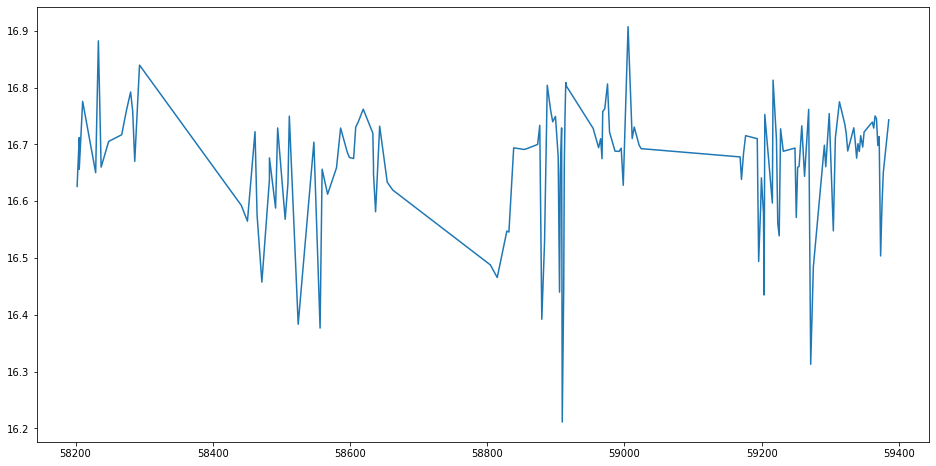

In [30]:
index = 199
row = agn_fit_data.iloc[index]

# grab light curve data
times = convert_to_float_list(row['Times (MJD)'])
y = convert_to_float_list(row['Magnitudes'])

# check if lists are good
if y == flag or times == flag:
    raise Exception('Magnitude or Times are not in a valid format')

fig = plt.figure(figsize=(16, 8))
plt.plot(times, y)

print('BAT ID = ' + str(row['BAT ID']))
print('LC Length = ' + str(row['LC Length']))
print('Best Fit = ' + str(row['Best Fit']))
print('logLbol = ' + str(row['logLbol']))
print('SNR = ' + str(row['SNR']))

plt.show()

### 2.2 Short Light Curves
Light curves of length < 150

#### Create Dataframe of Short Light Curves

In [29]:
# dataframe of short light curves to look at
short_agn_curves = get_curves_of_max_value(agn_fit_data, 'LC Length', 150)
len(short_agn_curves)

101

#### Histograms of short_agn_curves

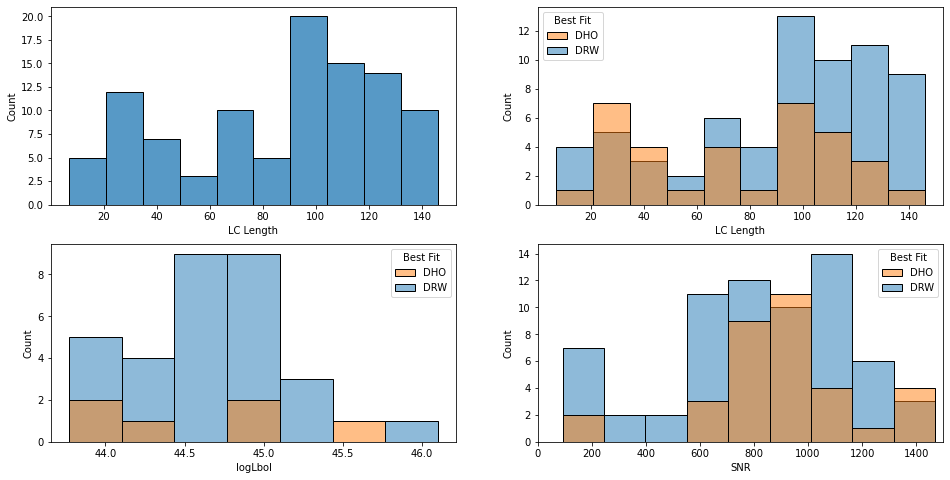

In [43]:
# light curves of length < 150
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

num_bins = 10

#######
# row 0
#######
row = 0

# histogram of LC Length
sns.histplot(data=short_agn_curves, x='LC Length', bins=num_bins, ax=axs[row,0])

# histogram of LC Length for best fit
sns.histplot(data=short_agn_curves, x='LC Length', hue='Best Fit', palette=['C1', 'C0'], bins=num_bins, ax=axs[row,1])

#######
# row 1
#######
row += 1

# histogram of LBol for best fit
sns.histplot(data=short_agn_curves, x='logLbol', hue='Best Fit', palette=['C1', 'C0'], ax=axs[row,0])

# histogram of SNR for best fit
sns.histplot(data=short_agn_curves, x='SNR', hue='Best Fit', palette=['C1', 'C0'], ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 
# note: there are some outliers

plt.show()

#### Scatter Plots of short_agn_curves

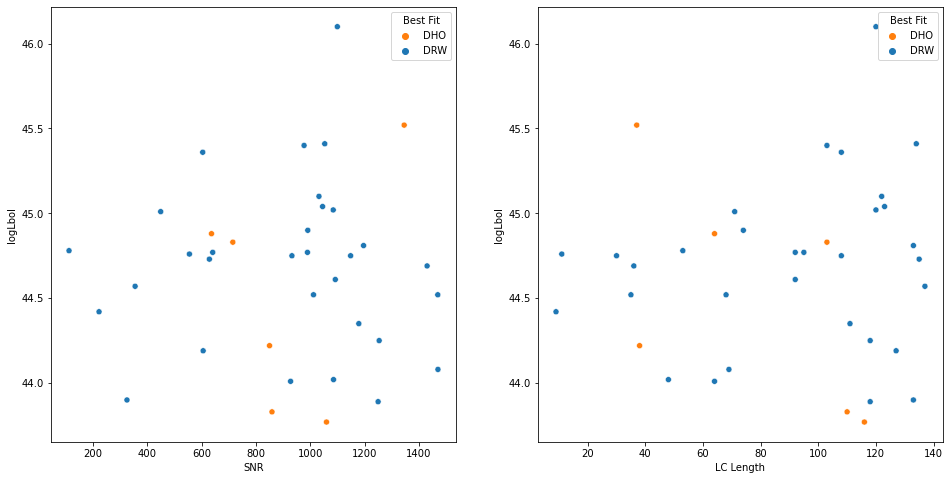

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# SNR vs LBol
sns.scatterplot(data=short_agn_curves, x='SNR', y ='logLbol', hue='Best Fit', palette=['C1', 'C0'], ax=axs[0])

# LC Length vs LBol
sns.scatterplot(data=short_agn_curves, x='LC Length', y ='logLbol', hue='Best Fit', palette=['C1', 'C0'], ax=axs[1])

plt.show()

### 2.3 Shortest Light Curves
Light curves of length < 20

In [42]:
# dataframe of notably short light curves to look at
shortest_agn_curves = get_curves_of_max_value(agn_fit_data, 'LC Length', 20)
shortest_agn_curves

,BAT ID,Times (MJD),Magnitudes,Mag Errors,Chi-sq DRW Fit,Chi-sq DHO Fit,Best Fit,logLbol,SNR,LC Length
0,119,[58340.4990394 58373.4279051 58383.4751273 584...,[20.9576988 21.4786701 21.9123707 21.4694214 2...,[0.16898823 0.2045275 0.23411345 0.20389664 0...,5.519431e-02,3.762700,DRW,NaN,101.684826,7.0
1,127,[59092.4560532 59129.3788194 59149.2851736 591...,[16.7190876 16.6395721 16.4415245 16.5804787 1...,[0.03127416 0.03046914 0.02864798 0.02989946 0...,1.850929e+00,7.229609,DRW,44.76,554.717961,11.0
2,609,[58506.4947454 58507.5050463 58560.2274769 585...,[13.8903379 13.7329035 13.9851017 14.0539074 1...,[0.00952068 0.00928688 0.00966618 0.00977431 0...,1.562136e+02,0.139760,DHO,NaN,1459.781083,12.0
3,786,[58269.3327662 58269.3332176 58329.2139352 583...,[19.3863602 19.2863445 19.7680302 19.6772995 1...,[0.07740089 0.07214428 0.10034218 0.09450319 0...,2.544831e+00,17.029658,DRW,NaN,227.642505,17.0
4,923,[58274.3775116 58292.3373495 58647.3348264 590...,[19.316082 19.7383537 19.5685902 19.9681683 1...,[0.08598535 0.09148367 0.09104895 0.08505446 0...,4.478226e-07,4.464059,DRW,44.42,221.916165,9.0


### 2.4 Low SNR
Light curves of SNR < 200

In [35]:
low_snr_agn_curves = get_curves_of_max_value(agn_fit_data, 'SNR', 200)
low_snr_agn_curves

,BAT ID,Times (MJD),Magnitudes,Mag Errors,Chi-sq DRW Fit,Chi-sq DHO Fit,Best Fit,logLbol,SNR,LC Length
0,5,[58252.467963 58252.4684838 58255.4317361 582...,[20.3061562 20.148098 19.9521751 20.8079872 2...,[0.12992024 0.14134934 0.12475588 0.19658697 0...,2.180009e+01,113.859885,DRW,NaN,134.024589,306.0
1,18,[58292.4545023 58312.4678819 58314.4668056 583...,[21.5398254 21.3304901 21.5236073 21.2296791 2...,[0.23370814 0.21958768 0.23261416 0.21278751 0...,1.408171e+01,0.005479,DHO,NaN,92.268836,27.0
2,77,[58291.4494444 58300.4637847 58303.4548148 583...,[15.6015663 15.5417223 15.5534048 15.5294027 1...,[-0.0110835 -0.01025064 -0.01041721 -0.010072...,2.153190e+03,NaN,DHO,44.27,-2714.513755,409.0
3,119,[58340.4990394 58373.4279051 58383.4751273 584...,[20.9576988 21.4786701 21.9123707 21.4694214 2...,[0.16898823 0.2045275 0.23411345 0.20389664 0...,5.519431e-02,3.762700,DRW,NaN,101.684826,7.0
4,120,[58273.482338 58279.466956 58290.4514468 582...,[19.5107899 20.0381622 19.7805176 19.7600632 1...,[0.08115058 0.11284654 0.09592216 0.09469964 0...,3.167948e-01,8.360720,DRW,NaN,194.395813,220.0
5,172,[58300.4688889 58313.4756829 58319.4279282 583...,[19.8437138 20.4143181 20.4147377 20.2537003 2...,[0.09917746 0.14372137 0.14375824 0.12997279 0...,9.707066e+00,89.490328,DRW,NaN,150.900647,180.0
6,209,[58345.4550231 58348.4961227 58351.4632639 583...,[20.0453262 20.040287 19.9398727 20.0228081 2...,[0.15352145 0.15313715 0.14538968 0.1517996 0...,1.726343e+01,60.809370,DRW,NaN,143.318013,134.0
7,214,[58313.4729282 58323.4472454 58338.4448495 583...,[19.8860378 20.0516853 20.0942383 19.9064865 2...,[0.10161509 0.11196927 0.11481468 0.10283191 0...,9.864015e-02,NaN,DHO,45.36,166.140271,219.0
8,372,[58206.1348148 58426.5001505 58427.5027199 584...,[19.2830753 19.2540379 19.2458191 19.433897 1...,[0.09036791 0.08876447 0.08831525 0.09910027 0...,5.711793e-09,44.033741,DRW,NaN,194.106356,61.0
9,445,[58202.2649537 58206.2158218 58244.1938773 582...,[20.0703812 20.1459866 20.0100918 20.4193745 2...,[0.12690943 0.13354975 0.12177312 0.15902971 0...,2.442532e-14,66.758597,DRW,NaN,144.527655,118.0


#### Histogram

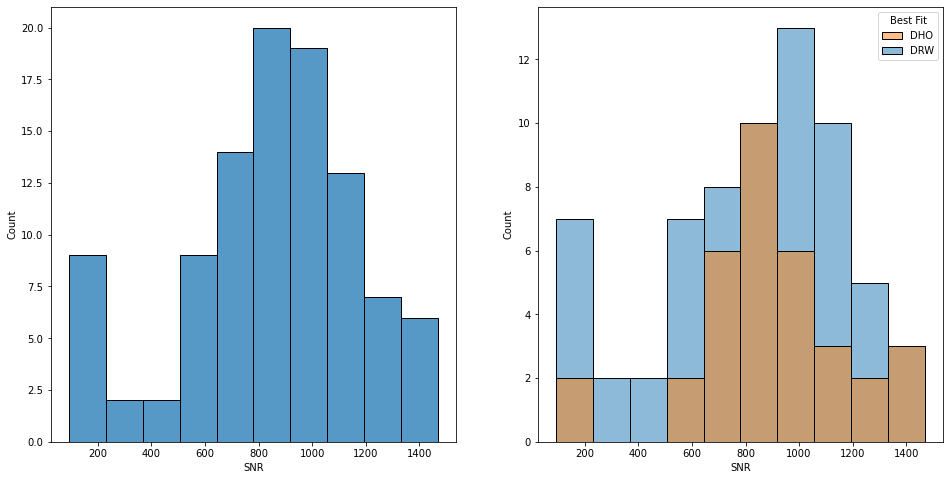

In [50]:
# light curves of length < 150
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

num_bins = 10

# histogram of LC Length
sns.histplot(data=short_agn_curves, x='SNR', bins=num_bins, ax=axs[0])

# histogram of LC Length for best fit
sns.histplot(data=short_agn_curves, x='SNR', hue='Best Fit', palette=['C1', 'C0'], bins=num_bins, ax=axs[1])

plt.show()

#### Plot Negative SNR Curve

BAT ID = 77
LC Length = 409.0
Best Fit = DHO
logLbol = 44.27
SNR = -2714.513755245218


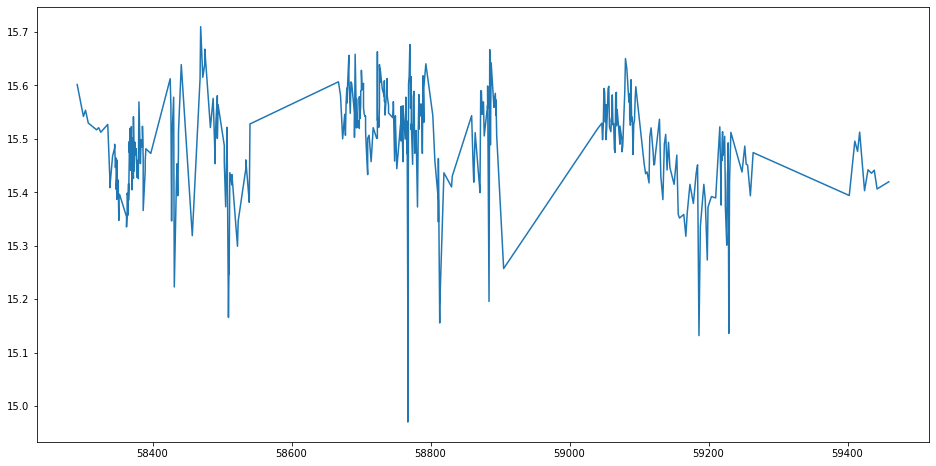

In [36]:
index = 2
row = low_snr_agn_curves.iloc[index]

# grab light curve data
times = convert_to_float_list(row['Times (MJD)'])
y = convert_to_float_list(row['Magnitudes'])

# check if lists are good
if y == flag or times == flag:
    raise Exception('Magnitude or Times are not in a valid format')

fig = plt.figure(figsize=(16, 8))
plt.plot(times, y)

print('BAT ID = ' + str(row['BAT ID']))
print('LC Length = ' + str(row['LC Length']))
print('Best Fit = ' + str(row['Best Fit']))
print('logLbol = ' + str(row['logLbol']))
print('SNR = ' + str(row['SNR']))

plt.show()

#### Plot Lowest (positive) SNR

BAT ID = 18
LC Length = 27.0
Best Fit = DHO
logLbol = nan
SNR = 92.26883648073448


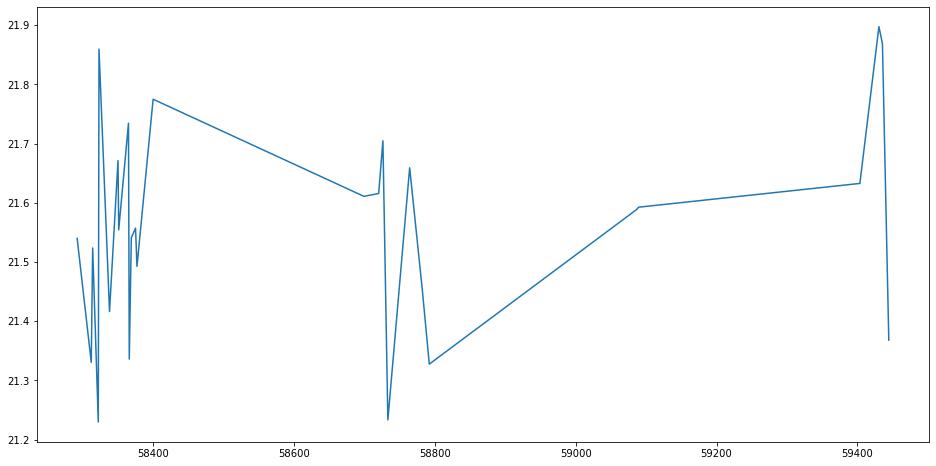

In [44]:
index = 1
row = low_snr_agn_curves.iloc[index]

# grab light curve data
times = convert_to_float_list(row['Times (MJD)'])
y = convert_to_float_list(row['Magnitudes'])

# check if lists are good
if y == flag or times == flag:
    raise Exception('Magnitude or Times are not in a valid format')

fig = plt.figure(figsize=(16, 8))
plt.plot(times, y)

print('BAT ID = ' + str(row['BAT ID']))
print('LC Length = ' + str(row['LC Length']))
print('Best Fit = ' + str(row['Best Fit']))
print('logLbol = ' + str(row['logLbol']))
print('SNR = ' + str(row['SNR']))

plt.show()